In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nizamhusen/MachineLearning/main/datasets/customer_segmentation_data.csv')

In [3]:
# Display first few rows of the dataset
print(df.head())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [4]:
# Data Cleaning: Check for missing values
print(df.isnull().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [5]:
# Remove rows with missing values (if any)
df = df.dropna()

In [6]:
# Feature extraction: Select relevant columns
features = df[['age', 'income']]

In [7]:
# Standardize the features for K-Means clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


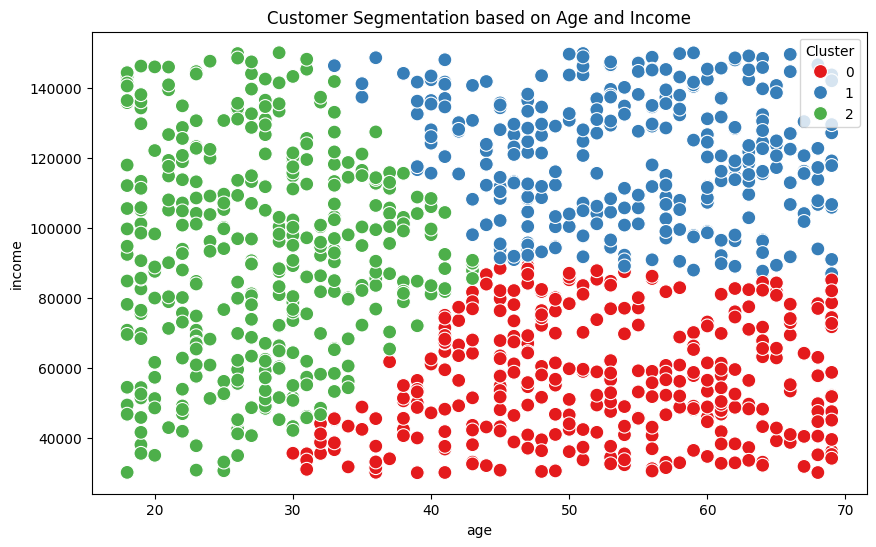

In [9]:
# Visualize the clusters using Age and Income
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['age'], y=df['income'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation based on Age and Income')
plt.show()

In [10]:
# Apply classification: Using Random Forest to classify customer segments
X = scaled_features
y = df['Cluster']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [14]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[110   0   3]
 [  0  77   0]
 [  1   1 108]]


In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       113
           1       0.99      1.00      0.99        77
           2       0.97      0.98      0.98       110

    accuracy                           0.98       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.98      0.98      0.98       300



In [16]:
# Visualize feature importance from the Random Forest classifier
feature_importances = rf_classifier.feature_importances_
feature_names = ['age', 'income']

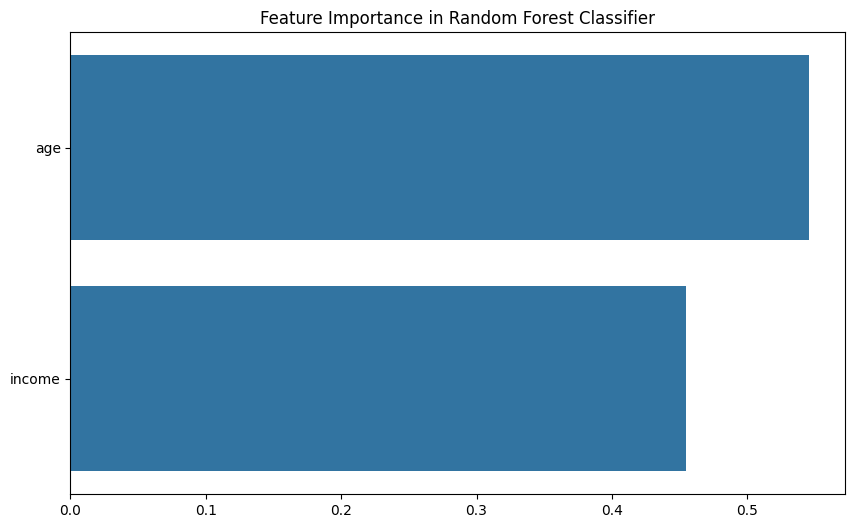

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()